# SF DAs in the post-COVID Office

This homework question is a reskinned version of the famous [hat-check problem](https://proofwiki.org/wiki/Hat-Check_Problem).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Derangement4.png/1280px-Derangement4.png" width="600 px"/>

## Question

> Let's say SF Flexporters return to a post-COVID working arrangement wherein each of the 20 DAs are "buddied up" with one other DA. Effectively, there are two shifts: a Monday shift (10 DAs) and a Friday shift consisting of the other 10 DAs (i.e., the buddies of those in the first shift). 
>
> Assume that seating is random and independent (i.e., no coordination of seats between buddies or among those in a shift) -- people just show up and sit somewhere.
>
> **What's the probability that no one in the Friday shift is sitting in the same seat as their \[Monday shift\] buddy?**

## Numerical Solution

The following cells approach this problem from the perspective of the *frequentist* asking, "What is the long-run average proportion of times we would not see any pair of buddies sitting in the same seat?"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

First, let's write a function that simulates many weeks of seating outcomes and count those that match the event we care about (i.e., no one sits in the same seat as his/her buddy).

In [2]:
num_trials = 1_000_000
def derange_simulator(num_trials, num_DAs=10):
  
  results = []

  # Instantiate random number generator
  rng = np.random.default_rng()
  
  for _ in range(num_trials):

    # Model seating arrangements for each shift
    monday_crew = rng.choice(num_DAs, num_DAs, replace=False)
    friday_crew = rng.choice(num_DAs, num_DAs, replace=False)

    # Check if pairs of buddies are in same seat
    any_matches = (monday_crew == friday_crew).any()

    # Return 1 (one) if NO pair of buddies sat in the same seat
    results.append(1 - int(any_matches))
  
  return results

In [3]:
# Create dataframe
df = pd.DataFrame(data=derange_simulator(num_trials), 
                  columns=['results'])

# Calculate probabilities as we amass trials
df['cumulative_occurrences'] = df['results'].cumsum()
df['cumulative_trials'] = df.index + 1
df['p_no_match'] = df['cumulative_occurrences'] / df['cumulative_trials']

# Preview last 5 trials
df.tail(5)

,results,cumulative_occurrences,cumulative_trials,p_no_match
999995,1,368415,999996,0.368416
999996,1,368416,999997,0.368417
999997,0,368416,999998,0.368417
999998,0,368416,999999,0.368416
999999,0,368416,1000000,0.368416


Let's see how the probability converges as we increase our sample size (i.e., the "frequentist" interpretation):

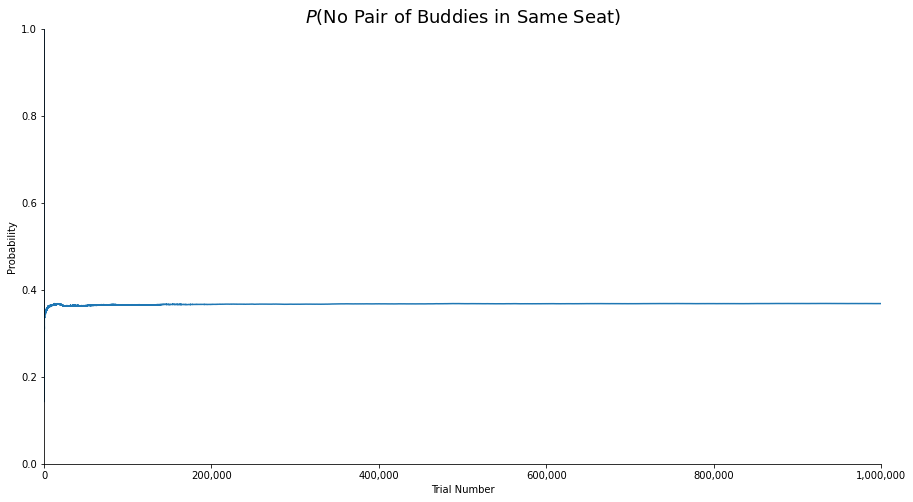

In [4]:
# Plot
plt.figure(figsize=(15,8))
plt.plot(df['cumulative_trials'], df['p_no_match'])
ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlim(0,df.shape[0])
ax.set_ylim(0, 1)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel('Trial Number')
ax.set_ylabel('Probability')

plt.title('$P( $No Pair of Buddies in Same Seat$ )$', fontsize=18)

plt.show()

*Aside*: The **Law of Large Numbers** (LoLN) is what allows us to make this kind of numerical approximation!

In [5]:
# Numerical answer
df.iloc[-1]

results                         0.000000
cumulative_occurrences     368416.000000
cumulative_trials         1000000.000000
p_no_match                      0.368416
Name: 999999, dtype: float64

## Analytical Solution

Recall the **Principle of Inclusion-Exclusion** when performing an arbitrary number of unions:

$$
\left|\bigcup_{i=1}^n A_i\right| = \sum_{i=1}^n|A_i| -\sum_{1 \leq i \lt j \leq n} |A_i \cap A_j| + \sum_{1 \leq i \lt j \lt k \leq n} |A_i\cap A_j\cap A_k| - \ \cdots\ + \left(-1\right)^{n-1} \left|A_1 \cap \cdots \cap A_n\right|
$$

We can leverage this fact directly if we define our events properly. 

If you're thinking Venn diagrams, all that this crazy looking thing does is perform the computation of the area of a symmetric Venn diagram with $n$ sets...and the area of the sets in a Venn diagram *is* the union!

**Note**: Once you get past 4 sets, Venn diagrams get *incredibly* difficult to draw. In fact, a [symmetric 11-set Venn diagram](https://www.newscientist.com/article/dn22159-logic-blooms-with-new-11-set-venn-diagram/) was only discovered / proven to exist in 2012. So, if you find yourself trying to draw something complicated, save yourself some time and think of a different approach.

Let $A_i$ be the event that the $i^\text{th}$ pair of buddies sit in the same seat. Then, $\left|\bigcup_{i=1}^{10} A_i\right|$ counts all of the cases where at least one pair of buddies is in the same seat!

However, we want the *complement* of the probability of the event that at least one pair of buddies is in the same seat, i.e., $P(\bigcap_{i=1}^{10} A_{i}^{C}) = 1 - P(\bigcup_{i=1}^{10} A_i)$.

Because events are just sets, we can compute the probabilities of these sets/events, directly, using the principle of inclusion-exclusion:

$$
P\left(\bigcup_{i=1}^n A_i\right) = \sum_{i=1}^n P(A_i) -\sum_{1 \leq i \lt j \leq n} P(A_i \cap A_j) + \sum_{1 \leq i \lt j \lt k \leq n} P(A_i\cap A_j\cap A_k) - \ \cdots\ + \left(-1\right)^{n-1} P\left(A_1 \cap \cdots \cap A_n\right)
$$

And the assumptions work in our favor: we can use the **naive definition of probability** since seating is done randomly and independently (read: no DA, within and between the shifts, has any reason to favor one set more than another). This means once we count the "pebbles" we care about, we can divide by $10!$ to convert to a probability.

### Counting, Redux 🔢

<br>
<br>

> There is only one way to eat an elephant: a bite at a time.
>
> **Desmond Tutu**

Let's try to tackle our problem using the **principle of inclusion-exclusion** term-by-term.

The very first term just asks us to "add up" all the "circles" in our notional Venn diagram:

$$
P\left(\bigcup_{i=1}^n A_i\right) = \sum_{i=1}^n P(A_i) + \cdots
$$


First notice the *symmetry* of this problem: no DA buddy-pair behaves differently than another pair. So, if we start with the first pair (i.e., $i=1$), and we let them sit in the same seat (i.e., $A_{1}$), how many ways can we arrange the other $(10-1)$ Friday DAs? 

**Question**: 

> How do I arrange $n-1$ unique things?

**Answer**: 

> $$(n-1)!$$

That means we know that if we guarantee that one buddy-pair sits in the same seat, the other $(10-1) = 9$ Friday DAs can arrange themselves in $(10-1)! = 9!$ ways.

Ok, but that's if we explicitly choose the first DA buddy-pair (read: $A_{1}$, the first buddy-pair sat in the same seat). 

But we need the events that (in addition to the first buddy-pair) the second buddy-pair sits in the same seat (i.e., $A_{2}$), the third buddy-pair sits in the same seat (i.e., $A_{3}$), $\dots$, and the tenth buddy-pair sits in the same seat (i.e., $A_{10}$).

**Question**: 

> How many ways can I choose $k$ things from $n$ things?

**Answer**: 

> $$\binom{n}{k}=\frac{n!}{k!(n-k)!}$$

So for all $A_{i}$, there are $\binom{10}{1} = 10$ ways to choose which one particular pair sat in the same seat.

Notice, however, that an outcome in $A_{4}$ (read: the fourth DA buddy-pair sat in the same seat) could also fall into the event $A_{7}$ (read: the seventh DA buddy-pair sat in the same seat). That is, this outcome is in the event $A_{4} \cap A_{7}$.

How're we going to deal with the fact that a given "pebble" could be in multiple $A_{i}$?

No need to worry! The principle of inclusion-exlusion takes this into account with the alternating signs:

$$
P\left(\bigcup_{i=1}^n A_i\right) = \sum_{i=1}^n P(A_i) - \sum_{1 \leq i \lt j \leq n} P(A_i \cap A_j) + \sum_{1 \leq i \lt j \lt k \leq n} P(A_i\cap A_j\cap A_k) - \ \cdots\ + \left(-1\right)^{n-1} P\left(A_1 \cap \cdots \cap A_n\right)
$$

Alright, so we have all the info we need to get the first term:

$$
\sum_{i=1}^{10} P(A_i) = \binom{10}{1}\frac{(10-1)!}{10!}
$$

Let's just use the same logic to get the second term, which accounts for all the pairwise intersections. 

Remember, we pointed out one such event earlier: e.g., $A_{4} \cap A_{7}$. But how many of these \[pairwise\] events are there?

**Question**: 

> How many pairwise intersections are there among 10 events? Said another way, how many ways can we choose 2 buddy-pairs from 10 pairs in total?

**Answer**: 

> $$\binom{10}{2}=\frac{10!}{2!(10-2)!}$$

Okay, so now we have all the ways that an outcome can be a member of 2 events, but for each of these intersections, how many outcomes are there?

Let's just use $A_{1} \cap A_{2}$ for concreteness. How many outcomes are there when we know that the Friday-shift DAs from the first and second pair sat in the same seat as their buddies?

**Question**: 

> If we know buddy-pairs 1 and 2 sat in the same seat (i.e., $A_{1} \cap A_{2}$), how many ways can we arrange the other $(10-2)$ Friday-shift DAs?

**Answer**: 

> $$(10-2)!$$

We're onto something here!

Now we can just multiply the $\binom{10}{2}$ ways of choosing 2 buddy-pairs sitting in the same seat with the number of ways to arrange the other $10-2=8$ Friday DAs to get our second term:

$$
\sum_{1 \leq i \lt j \leq 10} P(A_i \cap A_j) = \binom{10}{2}\frac{(10-2)!}{10!}
$$

Sticking this into our equation we have, thus far, the following:

$$
P\left(\bigcup_{i=1}^{10} A_i\right) = \binom{10}{1}\frac{(10-1)!}{10!} - \binom{10}{2}\frac{(10-2)!}{10!} + \sum_{1 \leq i \lt j \lt k \leq n} P(A_i\cap A_j\cap A_k) - \ \cdots\ + \left(-1\right)^{n-1} P\left(A_1 \cap \cdots \cap A_n\right)
$$

But by now, you should see a pattern emerge. And you can verify this on your own that this pattern stays consistent.

Putting it all together, we get:

$$
P\left(\bigcup_{i=1}^{10} A_i\right) = \binom{10}{1}\frac{(10-1)!}{10!} - \binom{10}{2}\frac{(10-2)!}{10!} + \binom{10}{3}\frac{(10-3)!}{10!} - \ \cdots\ + \left(-1\right)^{10-1} \binom{10}{10}\frac{(10-10)!}{10!}
$$

Number crunching this (and taking the complement) will certainly yield the answer, but we can simplify things some more. Notice the form our solution takes:

$$
P\left(\bigcup_{i=1}^{10} A_i\right) = \sum_{k=1}^{10} \left(-1\right)^{k-1}\binom{10}{k}\frac{(10-k)!}{10!} = \sum_{k=1}^{10} \frac{\left(-1\right)^{k-1}}{k!}
$$

Since we want the complement (i.e., the probability that *no* one sits in the same seat as his/her buddy, we subtract what we've calculated thus far from 1:

$$
P\left(\bigcap_{i=1}^{10} A_i^C\right) = 1 - P\left(\bigcup_{i=1}^{10} A_i\right) = 1 - \sum_{k=1}^{10} \frac{\left(-1\right)^{k-1}}{k!} = \sum_{k=0}^{10} \frac{\left(-1\right)^{k}}{k!}
$$

Below, we can confirm this matches our numerical solution by calculating this sum using Python.

In [6]:
from math import factorial

# Python is a zero-indexed language, but because we simplified and brought
# the one into the sum, we can set index at 0 and count to 10, inclusively.
answer = 0
for k in range(10+1):
  answer += (-1)**k / factorial(k)

answer

0.3678794642857144

If you don't believe the simplification you did, you can also just compute directly once you've figured out the analytical approach (i.e., leveraging symmetry and counting) to make sure you simplified correctly.

In [7]:
def comb(n, k):
  return factorial(n) / (factorial(k) * factorial(n-k))

union_Ai = 0
for i in range (1, 10+1):
  union_Ai += (-1)**(i-1) * comb(10, i) * factorial(10-i) / factorial(10)

1 - union_Ai

0.3678794642857143

## Poisson Paradigm

### A teaser...

The simplified answer should look eerily familiar to you...

$$
\sum_{k=0}^{n} \frac{\left(-1\right)^{k}}{k!}
$$

Were it not for the minus in front of the 1, this would be the Taylor series approximation for $e$ (for $n \xrightarrow{}{\infty}$)!

$$
e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots = \lim_{n \to \infty} \sum_{k=0}^{n} \frac{x^{k}}{k!}
$$

Hmmmm...this "feels" like $e$ is hidden somewhere in this problem, but where?

Furthermore, this is so weird. We're dealing with discrete things (e.g., DAs, seats, seating arrangements) and yet there are echoes of $e$, which we generally associate with continuous things like *continuously* compounding growth, exponential decay, etc. 

To figure this out, we turn to one of the most, if not *the* most, important discrete distributions: the **Poisson**. But first, we need to get comfortable with random variables, expectation, and the Bernoulli distribution -- stay tuned. 😇

### ...for the eager!

*Note*: Don't worry if none of this makes sense to you right now...this is purely to see how powerful even the simple tools we are developing are!

The **Poisson Paradigm** allows us to approximate the distribution of the number of events that occur by a Poisson distribution. Concretely, for our problem, we can use the fact that there are reasonably many DAs (large $n$ assumption), the probability a DA sits in the same seat as his/her buddy is relatively small (small $p_{i}$ assumption), and each of the $A_{i}$ are independent or weakly dependent.

If we feel good about this problem not violating those assumptions, then we can say:

$$
X = \sum_{i=1}^{n} I(A_{i})\text{, where $I$ is an indicator random variable}
$$

Thus, $X$ counts how many of the $A_{i}$ occur. By the Poisson Paradigm, we can say that $X \sim \text{Pois($\lambda$)}$ where $\lambda = \sum_{i=1}^{n} p_{i}$ is the rate parameter of a Poisson distribution by **linearity of expectation** and the fact that the $E(X) = \lambda$ since $X \sim \text{Pois($\lambda$)}$.

We haven't touched on this yet, but the **probability mass function** for a random variable $X$ that is distributed Poisson with a rate parameter $\lambda$ is:

$$
P\left(X=x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}
$$

Here's where $e$ shows up!

So let's figure out what our rate parameter, $\lambda$ is to model the number of matching DA buddy-pairs using a Poisson distribution according to the Poisson Paradigm:

In [8]:
# By symmetry, the probability any DA sits in his/her buddy's seat is the same
# regardless of the DA buddy-pair
p_A_i = 1/10

# We sum up all the P(A_i)
rate_param = 0
for i in range(1,10+1):
    rate_param += p_A_i
    
rate_param

0.9999999999999999

Knowing $\lambda = 1$, we can plot the PMF of $X \sim \text{Pois($1$)}$ and see what the probability is when $X = 0$, i.e., no DA buddy-pair sits in the same seat.

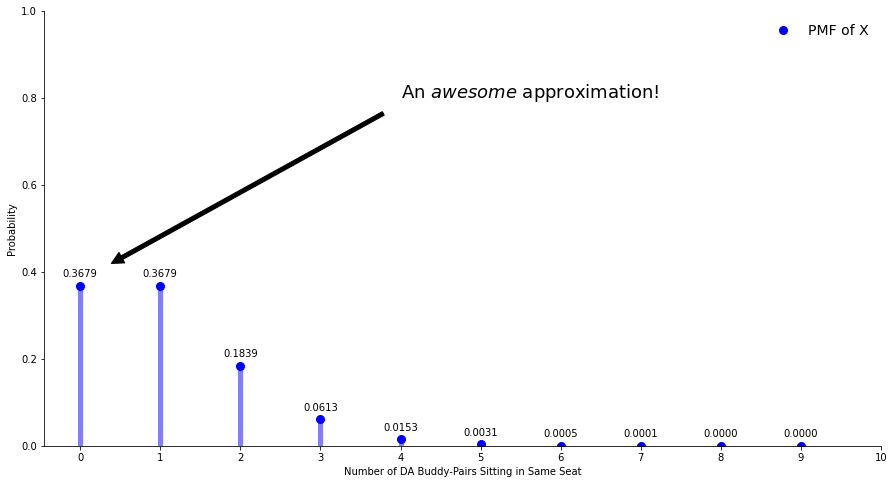

In [9]:
from scipy.stats import poisson

# Random variable X is distributed Poisson(rate_param)  
X = poisson(rate_param)
granularity = 1e-7
x = np.arange(X.ppf(granularity),
              X.ppf(1-granularity))

# We care about P(X = 0), the probability no DAs sit in the same seat
# as their buddies'; let's start with plot
fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Plot the PMF
ax.plot(x, X.pmf(x), 'bo', ms=8, label='PMF of X')
ax.vlines(x, 0, X.pmf(x), colors='b', lw=5, alpha=0.5)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlim(right=10)

# Plot labels for P(X=x)
for x, y in enumerate(X.pmf(x)):
    ax.text(x, y + .02, "%.4f" %y, ha="center")
    
# Annotate the P(X=0), what we care about
prop = dict(facecolor='black',
            shrink=0.05)
ax.annotate(r'An $\it{awesome}$ approximation!', 
            xy=(0.2, .4), xytext=(4, .8),
            fontsize=18, arrowprops=prop)

ax.set_xlabel('Number of DA Buddy-Pairs Sitting in Same Seat')
ax.set_ylabel('Probability')

ax.legend(loc='best', frameon=False, fontsize=14)

plt.show()